## Read displacement time-series of one pixel from timeseries HDF5 file ##

In [1]:
## Read/plot displacement time-series of one pixel from timeseries HDF5 file
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mintpy.objects import timeseries
from mintpy.utils import utils as ut, readfile, ptime, plot as pp
from mintpy.simulation.plot import *

# working 
proj_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/mintpy')
geom_file = os.path.join(proj_dir, './inputs/geometryRadar.h5')
ts_file = os.path.join(proj_dir, 'timeseries_ECMWF_ramp_demErr.h5')

# point of interest
lat, lon = -1.0352, -91.1917

# read dates into list of datetime.datetime objects
obj = timeseries(ts_file)
obj.open()
date_list = obj.dateList
dates = ptime.date_list2vector(date_list)[0]

# read displacement time-series into 1D np.ndarray in meters
# 1. convert lat/lon into row/col number for radar/geo coordinate files
coord = ut.coordinate(obj.metadata, lookup_file=geom_file)
y, x = coord.geo2radar(lat, lon)[0:2]
# 2. read
box = (x, y, x+1, y+1)
dis = readfile.read(ts_file, box=box)[0]

open timeseries file: timeseries_ECMWF_ramp_demErr.h5


save to file: test.png


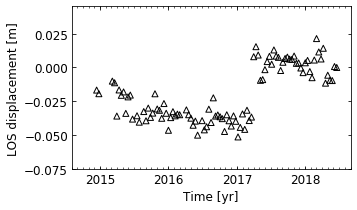

In [2]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 3])
ax.scatter(dates, dis, marker='^', s=6**2, facecolors='none', edgecolors='k', linewidth=1.)

# axis format
pp.auto_adjust_xaxis_date(ax, obj.times, fontsize=font_size)
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.set_xlabel('Time [yr]', fontsize=font_size)
ax.set_ylabel('LOS displacement [m]', fontsize=font_size)

# output
out_file = 'test.png'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()